In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import cv2

import warnings
warnings.filterwarnings('ignore')


In [5]:
train_path="/kaggle/input/isl-dataset/isl_data_grey_split/train"
test_path="/kaggle/input/isl-dataset/isl_data_grey_split/test"
labels=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [6]:
print(labels)
print(class_names_test)

['n', '7', 'r', '2', 'b', 'i', 'f', 'h', '5', 'e', 'u', 'm', '8', 'x', '0', 'k', 'q', 'y', 's', 'g', 'a', 'o', 't', 'v', 'z', '3', '1', 'c', '4', 'p', '9', 'l', '6', 'w', 'd', 'j']
['n', '7', 'r', '2', 'b', 'i', 'f', 'h', '5', 'e', 'u', 'm', '8', 'x', '0', 'k', 'q', 'y', 's', 'g', 'a', 'o', 't', 'v', 'z', '3', '1', 'c', '4', 'p', '9', 'l', '6', 'w', 'd', 'j']


In [7]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

In [8]:
gen = ImageDataGenerator(
                  rescale=1./255.,
                  horizontal_flip = True,
                  validation_split=0.2 # training: 80% data, validation: 20% data
                 )

In [9]:
train_generator = gen.flow_from_directory(train_path,subset="training",target_size=(331, 331),batch_size=32,shuffle=True,class_mode='categorical')
validation_generator = gen.flow_from_directory(train_path,subset="validation",target_size=(331,331),batch_size=32,shuffle=True,class_mode='categorical')

Found 15587 images belonging to 36 classes.
Found 3896 images belonging to 36 classes.


In [10]:
x,y = next(train_generator)
x.shape 


(32, 331, 331, 3)

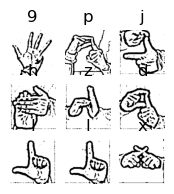

In [11]:
a = train_generator.class_indices
class_names = list(a.keys()) # storing class/breed names in a list


def plot_images(img, labels):
    plt.figure(figsize=[2, 2])
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plot_images(x,y)


**InceptionResNetV2****

In [ ]:
'''# load the InceptionResNetV2 architecture with imagenet weights as base
base_model = tf.keras.applications.InceptionResNetV2(
					include_top=False,
					weights='imagenet',
					input_shape=(331,331,3)
					)

base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.

model = tf.keras.Sequential([
		base_model,
		tf.keras.layers.BatchNormalization(renorm=True),
		tf.keras.layers.GlobalAveragePooling2D(),
		tf.keras.layers.Dense(512, activation='relu'),
		tf.keras.layers.Dense(256, activation='relu'),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(36, activation='softmax')
	])'''


In [ ]:
'''model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model
'''

In [ ]:
#model.summary()

In [ ]:
'''early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)
# early stopping call back
'''

In [ ]:

batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

'''# fit model
history = model.fit(train_generator,
                    verbose= 1,
					steps_per_epoch=STEP_SIZE_TRAIN,
					validation_data=validation_generator,
					validation_steps=STEP_SIZE_VALID,
					epochs=10,
					callbacks=[early])
'''

In [ ]:
'''# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')
'''

In [ ]:
# loss
'''plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()
'''

In [ ]:
'''accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])
'''

**Inception V3**

In [13]:
import os 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from  skimage.transform import resize
from keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import pickle

In [14]:
'''inception_v3_model = InceptionV3(
    input_shape = (200, 200, 3),
    include_top=False,
    weights='imagenet'
)
inception_v3_model.trainable=False'''

87910968/87910968 [==============================] - 0s 0us/step


In [15]:
'''inception_output_layer = inception_v3_model.get_layer('mixed7')
print('Inception model output shape:', inception_output_layer.output_shape)

inception_output = inception_v3_model.output'''

Inception model output shape: (None, 10, 10, 768)


In [16]:
from tensorflow.keras import layers
x = layers.GlobalAveragePooling2D()(inception_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(36, activation='softmax')(x)           
model = Model(inception_v3_model.input, x) 

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model
'''

In [25]:
'''early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)
# early stopping call back

batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# fit model
history = model.fit(train_generator,
                    verbose= 1,
					steps_per_epoch=STEP_SIZE_TRAIN,
					validation_data=validation_generator,
					validation_steps=STEP_SIZE_VALID,
					epochs=5,
					callbacks=[early])
'''

'early = tf.keras.callbacks.EarlyStopping( patience=10,\n\t\t\t\t\t\t\t\t\t\tmin_delta=0.001,\n\t\t\t\t\t\t\t\t\t\trestore_best_weights=True)\n# early stopping call back\n\nbatch_size=32\nSTEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size\nSTEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size\n\n# fit model\nhistory = model.fit(train_generator,\n                    verbose= 1,\n\t\t\t\t\tsteps_per_epoch=STEP_SIZE_TRAIN,\n\t\t\t\t\tvalidation_data=validation_generator,\n\t\t\t\t\tvalidation_steps=STEP_SIZE_VALID,\n\t\t\t\t\tepochs=5,\n\t\t\t\t\tcallbacks=[early])\n'

In [20]:
'''accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])
'''

122/122 [==============================] - 23s 184ms/step - loss: 0.0698 - accuracy: 0.9820
[0.06981121748685837, 0.982032835483551]
Accuracy: 98.2033%
Loss:  0.06981121748685837


**EfficientNet**

In [24]:
!pip install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00


In [26]:
#import efficientnet.keras as efn

**vgg16**

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16
#base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
base_model = tf.keras.applications.VGG16(
					include_top=False,
					weights='imagenet',
					input_shape=(331,331,3)
					)

base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [53]:
model = tf.keras.Sequential([
		base_model,
		tf.keras.layers.BatchNormalization(renorm=True),
		tf.keras.layers.GlobalAveragePooling2D(),
		tf.keras.layers.Dense(512, activation='relu'),
		tf.keras.layers.Dense(256, activation='relu'),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(36, activation='softmax')
	])


In [54]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)

In [56]:
batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# fit model
history = model.fit(train_generator,
                    verbose= 1,
					steps_per_epoch=STEP_SIZE_TRAIN,
					validation_data=validation_generator,
					validation_steps=STEP_SIZE_VALID,
					epochs=10,
					callbacks=[early])

Epoch 1/10
487/487 [==============================] - 143s 278ms/step - loss: 0.8462 - accuracy: 0.7639 - val_loss: 0.0780 - val_accuracy: 0.9773
Epoch 2/10
487/487 [==============================] - 129s 264ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0278 - val_accuracy: 0.9902
Epoch 3/10
487/487 [==============================] - 109s 223ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 4/10
487/487 [==============================] - 129s 264ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 5/10
487/487 [==============================] - 109s 223ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0189 - val_accuracy: 0.9941
Epoch 6/10
487/487 [==============================] - 128s 263ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0288 - val_accuracy: 0.9912
Epoch 7/10
487/487 [==============================] - 128s 264ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.0262 -

In [57]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

122/122 [==============================] - 26s 212ms/step - loss: 0.0239 - accuracy: 0.9931
[0.023941069841384888, 0.9930698275566101]
Accuracy: 99.3070%
Loss:  0.023941069841384888
